# Machine Learning Project
### Spring 2024
## Predicting Credit Card Account Cancellations

<br>
<br>
<p align="center">
<img 
  src="./files/credit_cards.png" 
  alt="Car Accident" 
  width="500"
  height="350"
/>
</p>

<br>

## Introduction
This is an individual assignment and will be a chance for you to perform an applied data science project on a real data set. 

We will be working with the `credit_card_df` data frame in this project. This data set contains information on over 4,000 customers of a U.S. bank. The description of this data and the variables contained in it are provided below.

The objective of this project is to explore the factors that lead to customers canceling their credit card accounts and develop machine learning algorithms that will predict the likelihood of a customer canceling their account in the future.

## Credit Card Account Data

The `credit_card_df` data frame contains information on the customers of a large U.S. bank which provides a number of financial services including multiple credit card offerings. 

The bank is looking to see if it can determine the factors that lead to customers canceling their credit card account and whether it can predict if a customer will cancel their account in the future. 

To maintain profits, banks must maximize the number of customers with credit lines. It is also in their best interests for customers to carry large credit card balances from month-to-month to maximize revenue from interest charges.

The bank has experienced record levels of customers closing their credit accounts in the past couple of years and this is leading to declining revenue.

The bank's goal is to become better at identifying customers at risk of canceling their account to minimize financial losses.

Specifically, the broad questions that the company is trying to answer include:

<br>

- What are the factors that are associated with customers closing their credit card accounts?
- Is it possible to predict whether a customer will close their account? If so, how accurate are the predictions?
  - How many costly errors is the model expected to produce?
- Are there any actions or policies the company can implement to reduce the risk of losing their customers?

<br>

The data set contains a mixture of customer demographics and their financial behavior.

The outcome variable in this data is `customer_status`. This variable records whether a customer eventually closed their account and indicates a financial loss to the company.

**Note**: The outcome variable has been coded as a factor with 'closed_account' (**the positive class**) as the first level. This is the format that `tidymodels` expects for calculating model performance metrics. There is no need to recode this variable in your machine learning process.

<br>

### Data Definitions

| Variable            	     | Definition                                 	                | Data Type    |
|:---------------------------|:-------------------------------------------------------------|:-------------|
| customer_status            | Customer status (closed account or active)                   | Factor       |
| age                        | Customer age                                                 | Numeric      |
| dependents                 | Number of dependents in household                            | Numeric      |
| education                  | Customer education level                                     | Factor       |
| marital_status             | Marital status                                               | Factor       |
| employment_status          | Employment status                                            | Factor       |
| income                     | Annual income (US Dollars)                                   | Numeric      |
| card_type                  | Type of credit card                                          | Factor       |
| months_since_first_account | Months since first credit card account activated             | Numeric      |
| total_accounts             | Total accounts (credit checking and savings)                 | Numeric      |
| months_inactive_last_year  | Months without credit card activity last year                | Numeric      |
| contacted_last_year        | Number of times contacted last year by sales representatives | Numeric      |
| credit_limit               | Current credit limit                                         | Numeric      |
| utilization_ratio          | Average monthly balance to credit limit                      | Numeric      |
| spend_ratio_q4_q1          | Ratio of total Q4 to Q1 spending last year                   | Numeric      |
| total_spend_last_year      | Total amount charged last year                               | Numeric      |
| transactions_last_year     | Number of transactions last year                             | Numeric      |
| transaction_ratio_q4_q1    | Ratio of total Q4 to Q1 transactions last year               | Numeric      |

In [250]:
# Load data
library(tidyverse)

credit_card_df <- readRDS(url('https://gmubusinessanalytics.netlify.app/data/credit_card_df.rds'))

In [251]:
# View data
credit_card_df

customer_status,age,dependents,education,marital_status,employment_status,income,card_type,months_since_first_account,total_accounts,months_inactive_last_year,contacted_last_year,credit_limit,utilization_ratio,spend_ratio_q4_q1,total_spend_last_year,transactions_last_year,transaction_ratio_q4_q1
<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
closed_account,46,3,masters,married,self_employed,67807,blue,36,2,3,4,4267,0.000,0.862,1067,23,0.769
closed_account,46,3,associates,married,self_employed,51785,blue,34,2,3,2,8583,0.000,0.358,1794,31,0.292
closed_account,44,4,masters,single,part_time,105643,gold,36,5,3,2,2367,0.678,0.956,4506,59,0.639
closed_account,62,1,masters,single,part_time,34138,gold,56,1,2,1,3109,0.000,1.054,5470,72,0.674
closed_account,38,1,masters,married,full_time,36264,blue,20,2,2,3,1621,0.358,0.421,1893,41,0.171
closed_account,43,3,associates,single,part_time,84234,blue,30,3,2,4,11336,0.000,0.691,1809,39,0.345
active,43,2,masters,married,full_time,35379,blue,35,3,1,3,4092,0.152,0.775,5001,88,0.492
closed_account,39,3,associates,married,part_time,67047,blue,29,4,3,4,2187,0.000,0.467,2031,40,0.333
active,54,1,masters,single,full_time,35903,gold,47,6,3,4,12873,0.000,1.005,3170,70,0.842


# Exploratory Data Analysis (50 Points)

In this section, you must think of at least 5 relevant questions that explore the relationship between `customer_status` and the other variables in the `credit_card_df` data set. The goal of your analysis should be discovering which variables drive the differences between customers who do and do not close their account.

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 3 plots (created with `ggplot`) and 3 summary data frames (created with `dplyr`) for the exploratory data analysis section. Among the plots you produce, you must have at least 3 different types (ex. box plot, bar chart, histogram, scatter plot, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

*Is there a relationship between employees leaving the company and their current salary?*

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1


**Question**: How does account closure relate to the age of the customer?

**Answer**: The analysis indicates that clients in the age group of 20–30, clients in the 40–50 age group are more likely to close their accounts. This insight into this pattern enables the bank to better customize its retention tactics, such as providing customers in that age group more targeted discounts.




## Supporting Analysis

In [252]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

`summarise()` has grouped output by 'age_group'. You can override using the
`.groups` argument.
New names:
• `` -> `...1`


age_group,customer_status,count,prop_closed
<fct>,<fct>,<int>,<dbl>
20 - 30,closed_account,40,0.3389831
30 - 40,closed_account,406,0.4379720
40 - 50,closed_account,1009,0.4643350
50 - 60,closed_account,563,0.4533011
60 - 70,closed_account,74,0.4431138


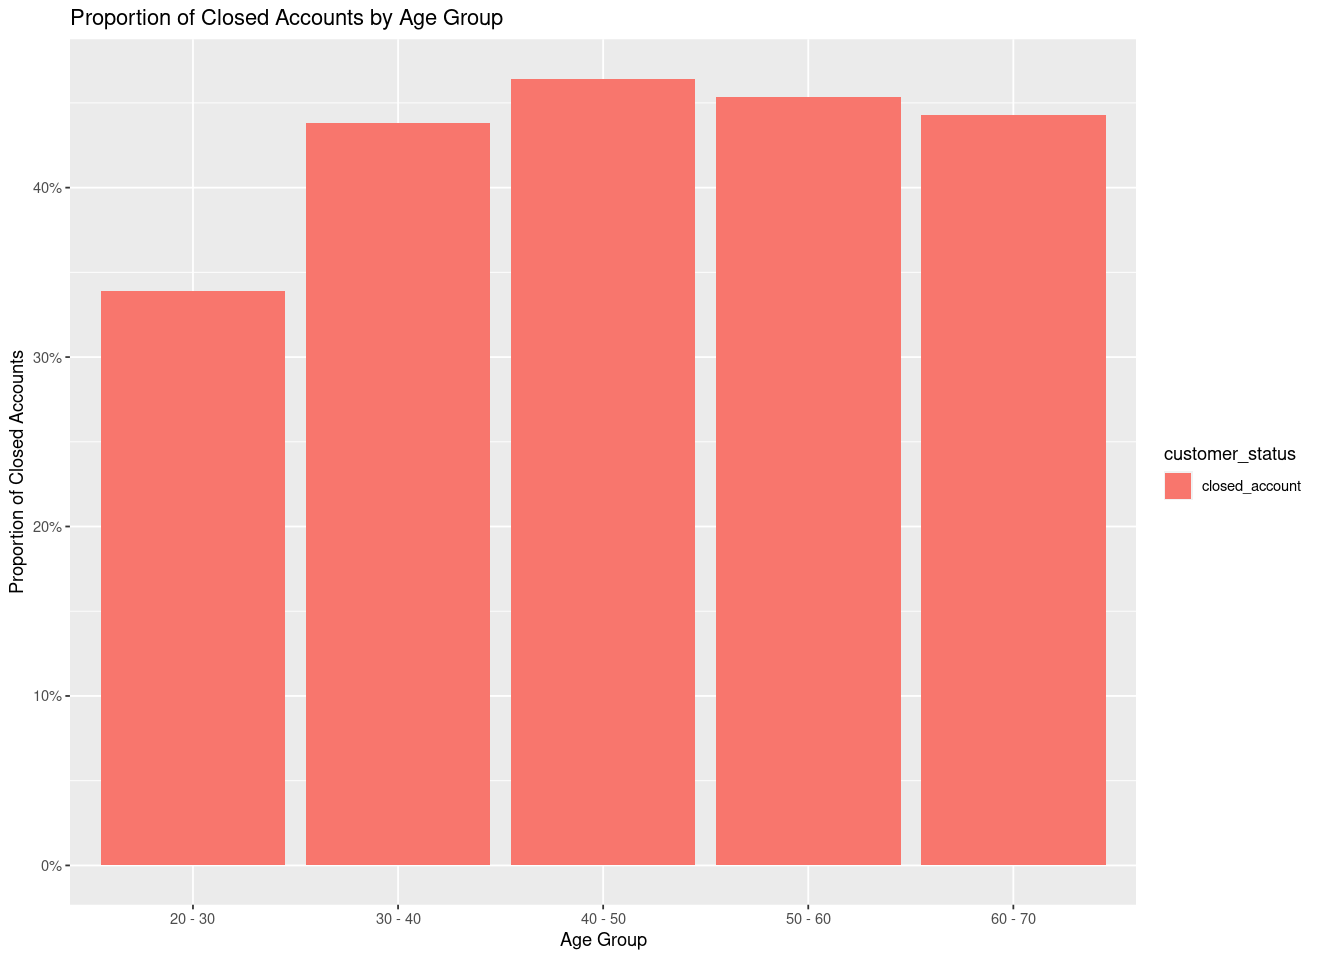

In [253]:
library(tidyverse)

# age groups
age_vs_status <- credit_card_df %>%
  select(customer_status, age) %>%
  mutate(age_group = cut(age, breaks = seq(0, 100, by = 10), labels = paste(seq(0, 90, by = 10), "-", seq(10, 100, by = 10))))

# closed vs active
age_group_summary <- age_vs_status %>%
  group_by(age_group, customer_status) %>%
  summarise(count = n()) %>%
  group_by(age_group) %>%
  mutate(prop_closed = count / sum(count)) %>%
  filter(customer_status == "closed_account")

# bar chart
age_barplot <- ggplot(age_group_summary, aes(x = age_group, y = prop_closed, fill = customer_status)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_y_continuous(labels = scales::percent_format()) +
  labs(x = "Age Group", y = "Proportion of Closed Accounts", title = "Proportion of Closed Accounts by Age Group")

print(age_barplot)
age_group_summary

## Question 2


**Question**: Does the income of clients who close their accounts differ from that of those who leave the account open?



**Answer**: from the analysis, clients who close their accounts and those who keep them open don't seem to differ much in terms of income. This implies that in this specific dataset, income might not be an effective indicator of account closure.




## Supporting Analysis


customer_status,mean_income,median_income
<fct>,<dbl>,<dbl>
closed_account,61601.51,47484
active,62842.83,50380


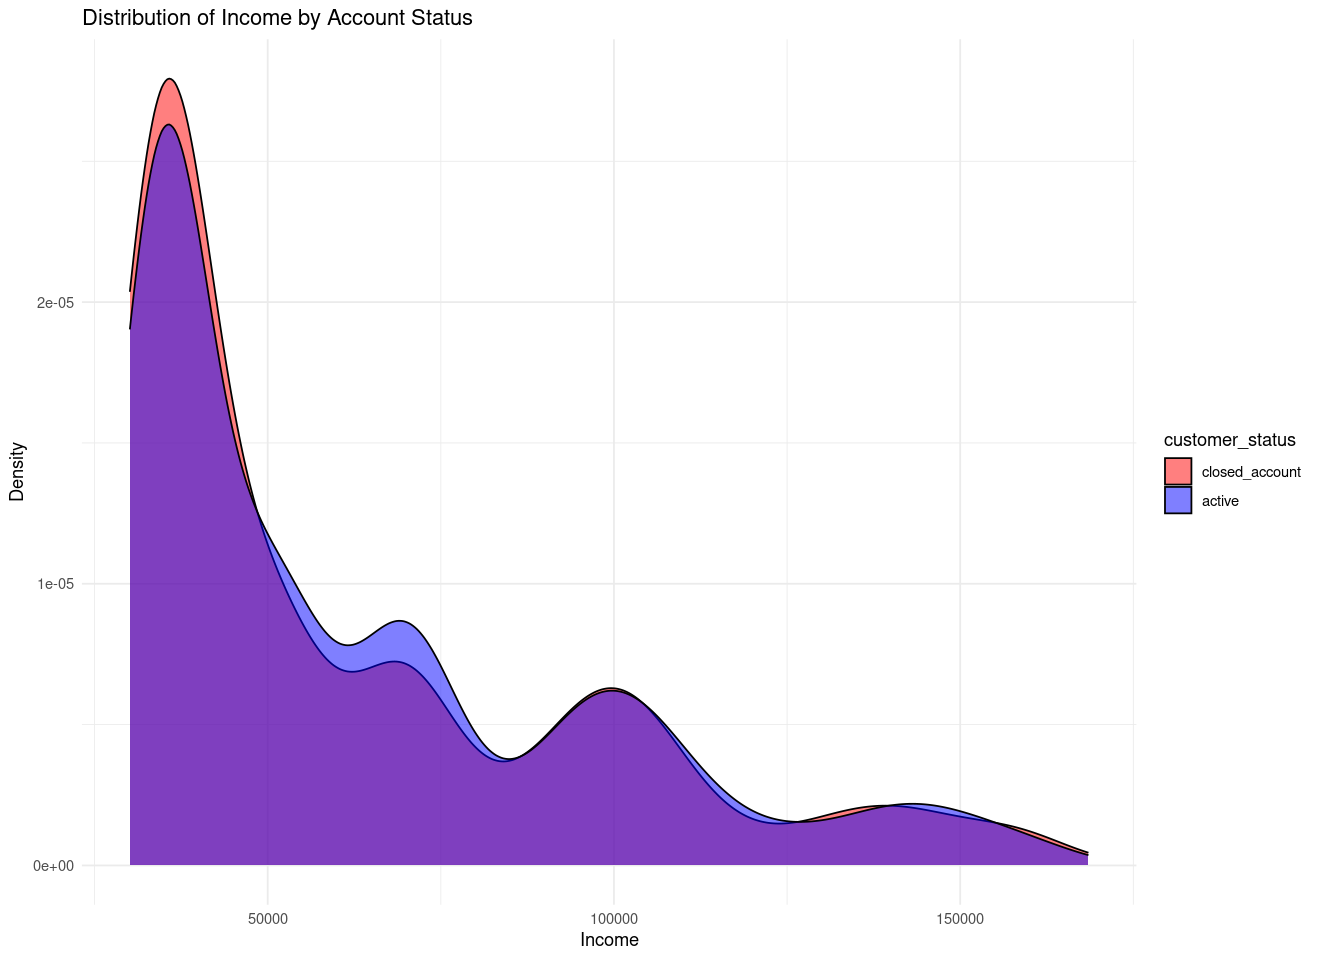

In [254]:
income_vs_status <- credit_card_df %>%
  select(customer_status, income)

# statistics of income
income_summary <- income_vs_status %>%
  group_by(customer_status) %>%
  summarise(
    mean_income = mean(income),
    median_income = median(income)
  )

# density plot
income_density_plot <- ggplot(income_vs_status, aes(x = income, fill = customer_status)) +
  geom_density(alpha = 0.5) +
  labs(x = "Income", y = "Density", title = "Distribution of Income by Account Status") +
  scale_fill_manual(values = c("closed_account" = "red", "active" = "blue")) +
  theme_minimal()

income_summary
print(income_density_plot)


## Question 3


**Question**: How are credit card limits different between clients who have closed their accounts and those who still have them open?



**Answer**: from this analysis there does not seem to be a significant variation in the distribution of credit limits between clients with closed accounts and those with active accounts. Similar to client income this implies that credit limit might not be a very reliable indicator of account termination.




## Supporting Analysis


customer_status,mean_credit_limit,median_credit_limit,min_credit_limit,max_credit_limit
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
closed_account,8145.746,4171,1430,34516
active,8794.175,4798,1430,34516


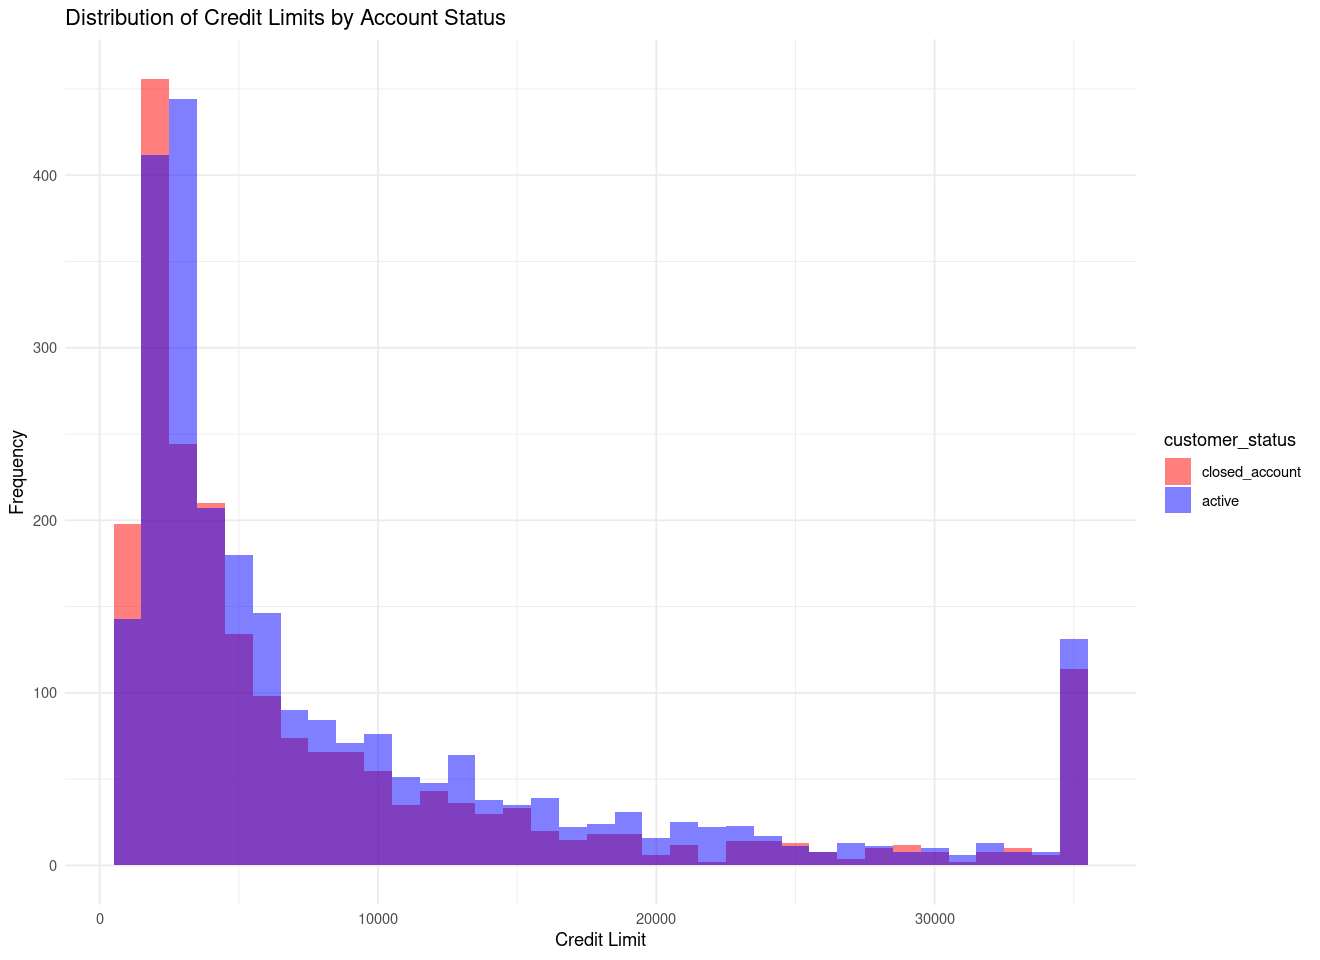

In [255]:
credit_limit_vs_status <- credit_card_df %>%
  select(customer_status, credit_limit)

# statistics of credit limits
credit_limit_summary <- credit_limit_vs_status %>%
  group_by(customer_status) %>%
  summarise(
    mean_credit_limit = mean(credit_limit),
    median_credit_limit = median(credit_limit),
    min_credit_limit = min(credit_limit),
    max_credit_limit = max(credit_limit)
  )

credit_limit_summary

# histogram
credit_limit_histogram <- ggplot(credit_limit_vs_status, aes(x = credit_limit, fill = customer_status)) +
  geom_histogram(binwidth = 1000, alpha = 0.5, position = "identity") +
  labs(x = "Credit Limit", y = "Frequency", title = "Distribution of Credit Limits by Account Status") +
  scale_fill_manual(values = c("closed_account" = "red", "active" = "blue")) +
  theme_minimal()

print(credit_limit_histogram)


## Question 4


**Question**: What differences do clients with closed vs active accounts have in the utilization ratio?



**Answer**: The findings indicate that compared to accounts with utilization ratios above 25%, those with ratios below 25% have a larger percentage of closures. This implies that there is a greater chance of account closure for those with lower utilization ratios as they are do not depend on credit cards.




## Supporting Analysis


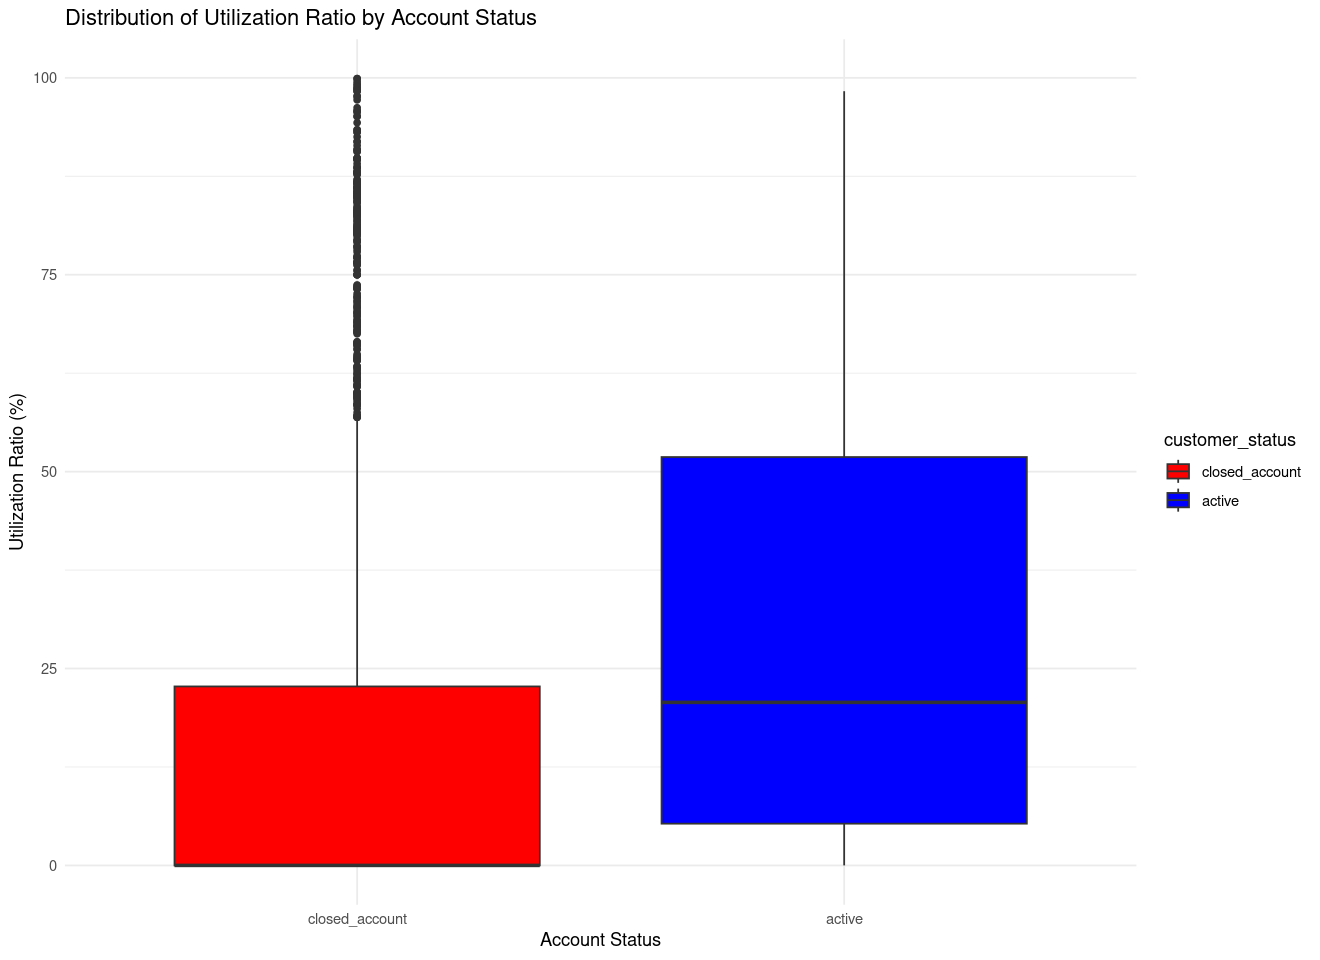

In [256]:
utilization_ratio_vs_status <- credit_card_df %>%
  select(customer_status, utilization_ratio)

utilization_ratio_vs_status <- utilization_ratio_vs_status %>%
  mutate(utilization_ratio_scaled = utilization_ratio * 100)

# box plot
utilization_ratio_boxplot <- ggplot(utilization_ratio_vs_status, aes(x = customer_status, y = utilization_ratio_scaled, fill = customer_status)) +
  geom_boxplot() +
  labs(x = "Account Status", y = "Utilization Ratio (%)", title = "Distribution of Utilization Ratio by Account Status") +
  scale_fill_manual(values = c("closed_account" = "red", "active" = "blue")) +
  theme_minimal()

print(utilization_ratio_boxplot)


## Question 5


**Question**: Are the educational backgrounds of customers who close their accounts and those who keep them open different?



**Answer**: The data suggests that clients who hold associates and masters degrees are more likely to close their accounts than those who hold bachelor's and doctoral degrees. This finding raises the possibility that account closure rates vary depending on a customer's level of education.



## Supporting Analysis


In [257]:
education_vs_status <- credit_card_df %>%
  select(customer_status, education)

# frequency of each education level
education_summary <- education_vs_status %>%
  group_by(customer_status, education) %>%
  summarise(count = n()) %>%
  spread(customer_status, count, fill = 0) %>%
  mutate(prop_closed = closed_account / (closed_account + active))

education_summary

`summarise()` has grouped output by 'customer_status'. You can override using
the `.groups` argument.


education,closed_account,active,prop_closed
<fct>,<dbl>,<dbl>,<dbl>
associates,874,1053,0.4535547
bachelors,201,268,0.4285714
masters,891,1104,0.4466165
doctorate,126,110,0.5338983


# Machine Learning Modeling (75 Points)
In this section of the project, you will fit **three classification algorithms** to predict the outcome variable,`customer_status`.

You must follow the machine learning steps below. 

The data splitting and feature engineering steps should only be done once so that your models are using the same data and feature engineering steps for training.

1. Split the `credit_card_df` data into a training and test set (remember to set your seed)
2. Specify a feature engineering pipeline with the `recipes` package
    - You can include steps such as skewness transformation, dummy variable encoding or any other steps you find appropriate
3. Specify a `parsnip` model object
    - You may choose from the following classification algorithms:
      - Logistic Regression
      - LDA
      - QDA
      - KNN
      - Decision Tree
      - Random Forest
4. Package your recipe and model into a workflow
5. Fit your workflow to the training data
    - If your model has hyperparameters:
      - Split the training data into 5 folds for 5-fold cross validation using `vfold_cv` (remember to set your seed)
      - Perform hyperparamter tuning with a random grid search using the `grid_random()` function
      - Refer to the following tutorial for an example - [Random Grid Search](https://gmubusinessanalytics.netlify.app/lesson-08-r-tutorial.html#Hyperparameter_Tuning14)
      - Hyperparameter tuning can take a significant amount of computing time. Be careful not to set the `size` argument of `grid_random()` too large. I recommend `size` = 10 or smaller.
      - Select the best model with `select_best()` and finalize your workflow
6. Evaluate model performance on the test set by plotting an ROC curve using `autoplot()` and calculating the area under the ROC curve on your test data

In [258]:
# Run this R code to install ML packages that you might need (Will take about 1 minute)
install.packages('vip')

Installing vip [0.4.1] ...
	OK [linked cache]


## Data Resampling
First split your data into training and test sets. If performing hyperparameter tuning, also create folds from your training data

In [259]:
library(tidymodels)
library(parsnip)
library(workflows)
library(yardstick)
library(recipes)


set.seed(123)



In [260]:
set.seed(333)
my_split <- initial_split(credit_card_df, prop = 0.7, strata = customer_status)
train_data <- training(my_split)
test_data <- testing(my_split)


## Feature Engineering Pipeline
Specify your feature engineering pipeline with the `recipes` package. You will use the pipeline when you create your modeling workflows below for each of your models.

In [261]:

# feature engineering pipeline
credit_card_rec <- recipe(customer_status ~ ., data = train_data) %>%
  step_center(all_numeric(), -all_outcomes()) %>%
  step_scale(all_numeric(), -all_outcomes()) %>%
step_dummy(all_nominal(), -all_outcomes())


## Model 1 Training

In [263]:

# logistic regression model
logistic_model <- logistic_reg() %>%
  set_engine("glm")  

logistic_workflow <- workflow() %>%
  add_recipe(credit_card_rec) %>%
  add_model(logistic_model)

logistic_fit <- logistic_workflow %>%
  fit(data = train_data)

## Model 1 Performance Evaluation

[1] "Logistic Regression AUC: roc_auc"          
[2] "Logistic Regression AUC: binary"           
[3] "Logistic Regression AUC: 0.930365258585334"


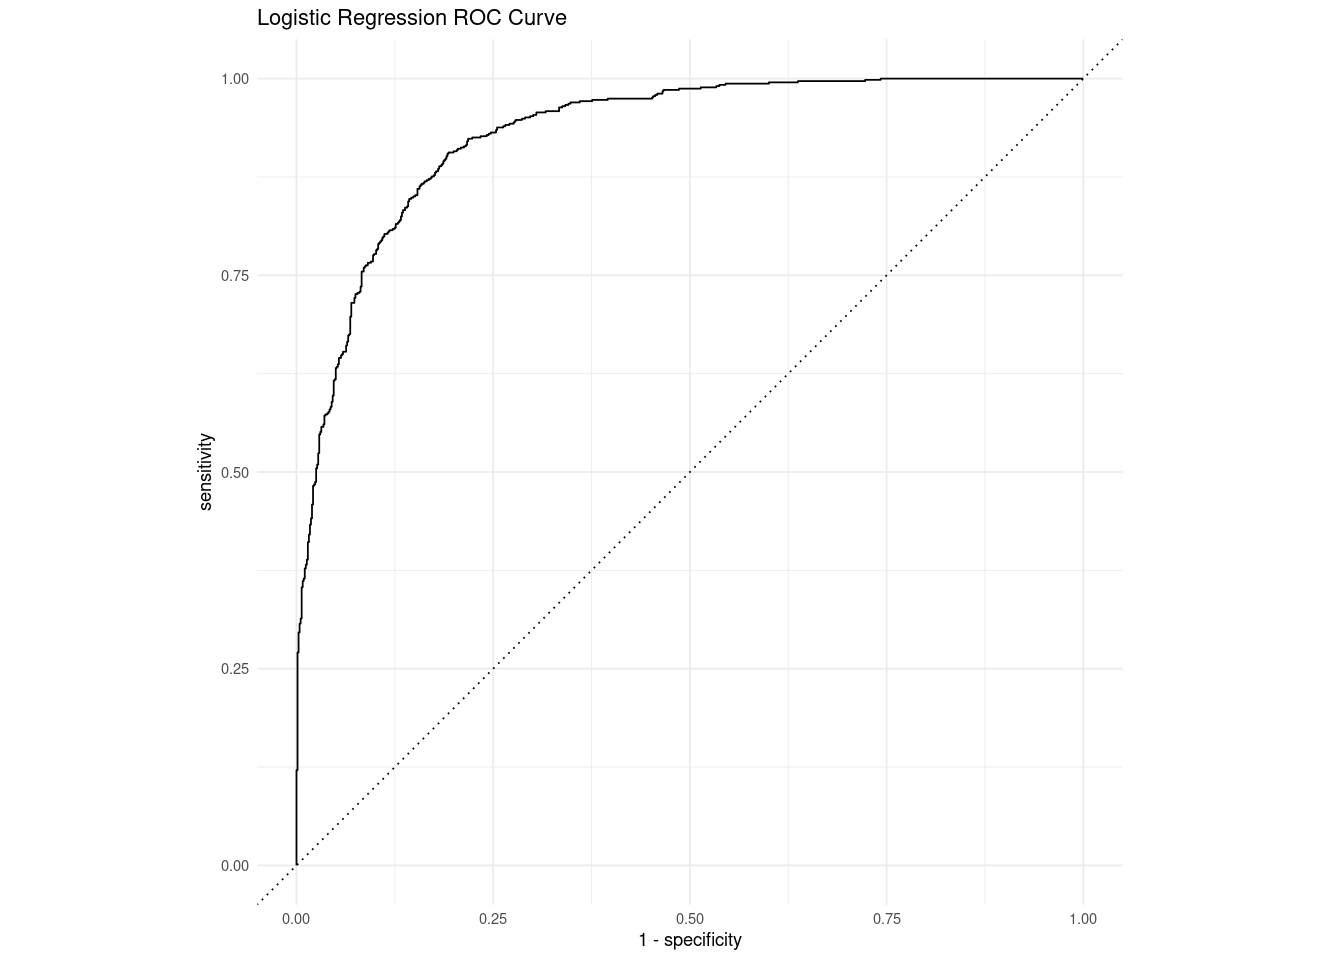

In [265]:
logistic_pred <- logistic_fit %>%
  predict(new_data = test_data, type = "prob") %>%
  bind_cols(test_data)

# ROC Plot
logistic_roc <- logistic_pred %>%
  roc_curve(truth = customer_status, .pred_closed_account) 

autoplot(logistic_roc) +
  labs(title = "Logistic Regression ROC Curve") +
  theme_minimal()

logistic_auc <- logistic_pred %>%
  roc_auc(truth = customer_status, .pred_closed_account) 

print(paste("Logistic Regression AUC:", logistic_auc))


## Model 2 Training

In [267]:
# Decision Tree model
decision_tree_model <- decision_tree() %>%
  set_engine("rpart") %>%
  set_mode("classification")

decision_tree_wf <- workflow() %>%
  add_recipe(credit_card_rec) %>%
  add_model(decision_tree_model)

decision_tree_fit <- decision_tree_wf %>%
  fit(data = train_data)


## Model 2 Performance Evaluation

[1] "decision tree: c(-Inf, 0.0606060606060606, 0.0649122807017544, 0.092, 0.215538847117794, 0.849112426035503, 0.912073490813648, 0.928909952606635, 0.948717948717949, 1, Inf)"      
[2] "decision tree: c(0, 0, 0.00788436268068327, 0.583442838370565, 0.754270696452037, 0.909329829172142, 0.92904073587385, 0.978975032851511, 0.994743758212878, 0.998685939553219, 1)"
[3] "decision tree: c(1, 1, 0.995222929936306, 0.928343949044586, 0.902866242038217, 0.85828025477707, 0.659235668789809, 0.192675159235669, 0.0700636942675159, 0.0127388535031847, 0)"


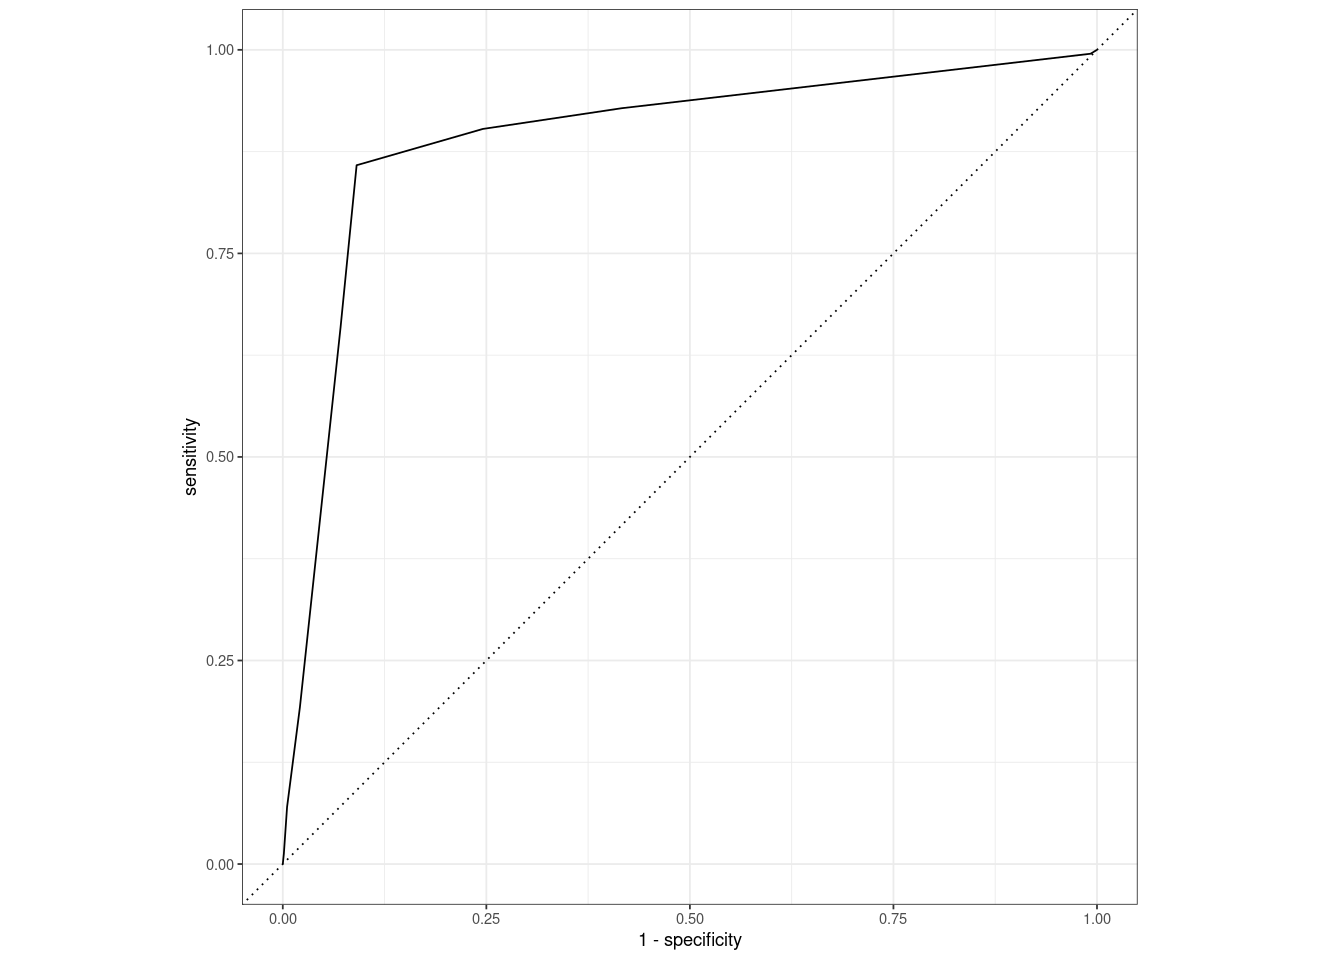

In [269]:
decision_tree_predictions <- decision_tree_fit %>%
  predict(new_data = test_data, type = "prob") %>%
  bind_cols(test_data)

roc_auc_dt <- decision_tree_predictions %>%
  roc_curve(truth = customer_status, .pred_closed_account)

roc_auc_dt %>%
autoplot()

print(paste("decision tree:", roc_auc_dt))


## Model 3 Training

In [271]:
install.packages("randomForest")

# Random Forest model
random_forest_model <- rand_forest() %>% 
  set_engine('randomForest') %>% 
  set_mode('classification')

RandomForest_workflow <- workflow() %>%
  add_model(random_forest_model) %>%
  add_recipe(credit_card_rec)

RandomForest_fit <- RandomForest_workflow %>% 
  last_fit(split = my_split)



Installing randomForest [4.7-1.1] ...
	OK [linked cache]


## Model 3 Performance Evaluation

                Truth
Prediction       closed_account active
  closed_account            595     37
  active                     33    724

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9496040
roc_auc,binary,0.9900828


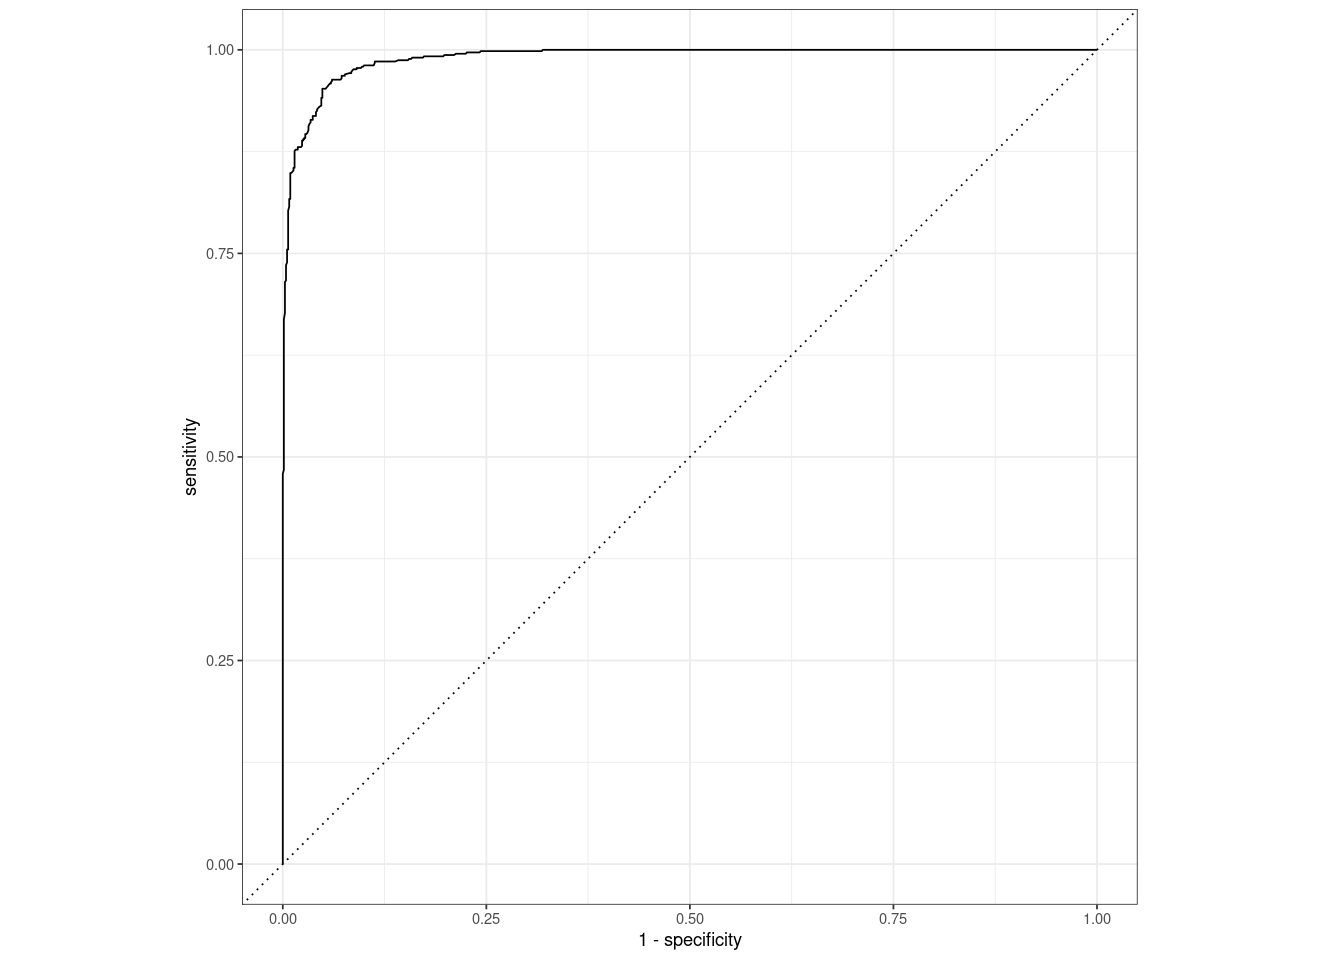

In [272]:
rf_fit_pred <- RandomForest_fit %>% collect_predictions()

rf_fit_pred %>%
  conf_mat(truth = customer_status, estimate = .pred_class)


custom_metrics <- metric_set(accuracy, yardstick::roc_auc)

rf_fit_pred %>% 
  custom_metrics(truth = customer_status, estimate = .pred_class, .pred_closed_account)
# ROC curve
rf_fit_pred %>% 
  roc_curve(truth = customer_status, .pred_closed_account) %>% 
  autoplot()


# Executive Summary (25 Points)

Write an executive summary of your overall findings and recommendations to the executives at the bank. Think of this section as your closing remarks of a presentation, where you summarize your key findings, model performance, and make recommendations to improve customer retention and service at the ban

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
- This section is meant to **establish the need for your recommendations** 
        in the following section

3. Your “best” classification model and an analysis of its performance 
	- In this section you should talk about the expected error of your model on future data
	 	- To estimate future performance, you can use your model performance results on the **test data**
    - You should discuss at least one performance metric, such as an F1, sensitivity, specificity, or ROC AUC for your model. However, you must explain the results in an **intuitive, non-technical manner**. Your audience in this case are executives at a telecommunications company with limited knowledge of machine learning.

4.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add your executive summary in the text block below**

In [ ]:
ndom 

## Introduction

We examined the dynamics of account closure in bank as a means of addressing the urgent need to improve client service and retention. Finding trends and insights that could guide tactical choices to reduce attrition and raise general customer happiness was the aim.





## Key Findings

- Age Group Analysis: Account closure rates are greater for clients in the 20–30 and 40–50 age groups, indicating the necessity for tailored retention measures for these populations.
- Income Disparity: Interestingly, clients who close their accounts and those who leave them open don't significantly differ in terms of income, suggesting that income may not be a good indicator of account closure.
- Credit Card limitations: Analysis shows that there is little value in using credit card limitations as a predictor of account cancellation because there is no apparent distinction between clients with closed accounts and those with active accounts.
- Utilization Ratio: Higher percentages of closures are observed in accounts with lower utilization ratios (below 25%), underscoring the need of understanding usage behavior.
- Educational Background: There may be a relationship between closure tendency and education level because clients with associate's and master's degrees are more likely to close their accounts than those with bachelor's and doctoral degrees.



## Modeling Results

With an amazing Area Under the Curve (AUC) of 0.99, the Random Forest model stood out as the most promising of the examined models. Strong predictive performance is indicated by this statistics, which measures the model's capacity to differentiate between positive and negative cases. The Logistic Regression model is a useful tool for proactive dropout management and focused intervention tactics because of its high AUC, which shows that it has superior discriminatory power in identifying probable churners. Because of the model's impressive performance, the bank can be confident that it will be able to prioritize and allocate resources towards keeping at-risk customers, which will maximize the bank's efforts to reduce attrition and strengthen long-term customer relationships.








## Recommendations

1. Targeted Retention Strategies: Create customized offers and incentives in order to hang on to customers, particularly in the 20–30 and 40–50 age ranges when account closure rates are greater.
- Business Impact: Increased revenue creation and improved brand reputation are the results of increased customer loyalty and decreased closure.
2. Usage Ratio Monitoring: To identify and engage clients who are at risk of leaving, it is recommended to proactively monitor usage ratios, especially for accounts with ratios less than 25%.
- Business Impact: Benefits for the business include lower acquisition costs and increased customer engagement and retention, which prolong profitability.
3. Improved Customer Education: To address probable reasons leading to account closure, provide associate's and master's degree holders with financial literacy classes or resources.
- Business Impact: improved financial management will lead to higher client satisfaction and loyalty, long-lasting partnerships, and decreased closure.

The bank may greatly improve client retention efforts and achieve long-term growth and market competitiveness by putting these data-driven recommendations into practice.




